# Student Success Classification

This notebook is intended to be a place where our team experiments, works with, and models the data. Our goal is to classify the status of students between 3 distinct classes:
1. Drop out
2. Graduated
3. Enrolled

There are 36 features to predict this including demographic information, academic information, financial information, and a few economic indicators.

## Importing the data

In [12]:
%%bash
ls data

metadata.csv
student-dropout-academic-success.csv


In [13]:
import pandas as pd

# importing data and insuring columns were read in correctly
raw_data = pd.read_csv("data/student-dropout-academic-success.csv", delimiter=";")
raw_data.columns = raw_data.columns.str.strip()
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

## Brief Look at the Data

In [17]:
# looking at target column
raw_data.Target.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [19]:
raw_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Looking column by column

In [22]:
df = raw_data.copy()  # copying data to create a working copy
df.columns = df.columns.str.replace(" ", "_").str.lower()

### Marital Status

In [25]:
df.marital_status.value_counts().sort_index()

marital_status
1    3919
2     379
3       4
4      91
5      25
6       6
Name: count, dtype: int64

1 – single 2 – married 3 – widower 4 – divorced 5 – facto union 6 – legally separated

We need to convert this ordinal column back to strings then we will one hot encode it.

In [15]:
df.marital_status = df.marital_status.map(
    {1: "single", 2: "married", 3: "widower", 4: "divorced", 5: "facto_union", 6: "legally_separated"}
)
grouped_marital_status = df.marital_status.value_counts()

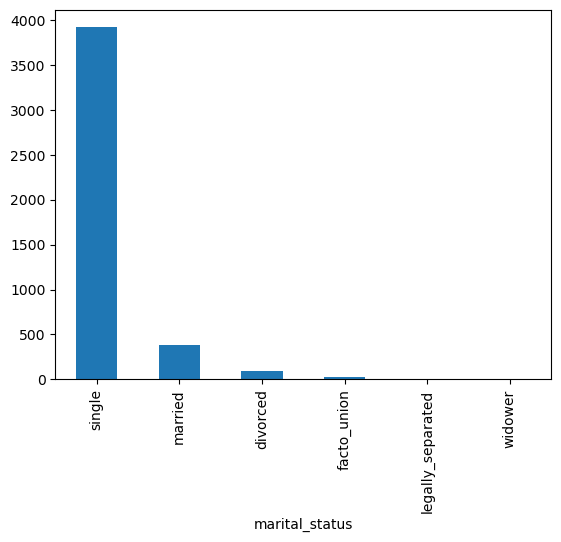

In [17]:
grouped_marital_status.plot(kind="bar");

In [82]:
normalized_target_by_marital = df.groupby(["marital_status", "target"])["target"].count() / df.groupby("marital_status")["target"].count()
normalized_target_by_marital

marital_status     target  
divorced           Dropout     0.461538
                   Enrolled    0.175824
                   Graduate    0.362637
facto_union        Dropout     0.440000
                   Enrolled    0.120000
                   Graduate    0.440000
legally_separated  Dropout     0.666667
                   Enrolled    0.166667
                   Graduate    0.166667
married            Dropout     0.472296
                   Enrolled    0.137203
                   Graduate    0.390501
single             Dropout     0.302118
                   Enrolled    0.183720
                   Graduate    0.514162
widower            Dropout     0.250000
                   Enrolled    0.500000
                   Graduate    0.250000
Name: target, dtype: float64

### Application Mode

In [83]:
df.application_mode.value_counts().sort_index()

application_mode
1     1708
2        3
5       16
7      139
10      10
15      30
16      38
17     872
18     124
26       1
27       1
39     785
42      77
43     312
44     213
51      59
53      35
57       1
Name: count, dtype: int64

- 1 - 1st phase - general contingent 
- 2 - Ordinance No. 612/93 
- 5 - 1st phase - special contingent (Azores Island) 
- 7 - Holders of other higher courses 
- 10 - Ordinance No. 854-B/99 
- 15 - International student (bachelor) 
- 16 - 1st phase - special contingent (Madeira Island) 
- 17 - 2nd phase - general contingent 
- 18 - 3rd phase - general contingent 
- 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 
- 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 
- 39 - Over 23 years old 
- 42 - Transfer 
- 43 - Change of course 
- 44 - Technological specialization diploma holders 
- 51 - Change of institution/course 
- 53 - Short cycle diploma holders 
- 57 - Change of institution/course (International)

We need to convert this ordinal column back to strings then we will one hot encode it. It is unclear that this should be ordinal or nominal. We will treat it as nominal for now.

In [84]:
df.application_mode = df.application_mode.map(
    {
        1: "1st_phase_general_contingent", 2: "Ordinance_No_612/93", 
        5: "1st_phase_special_contingent_Azores_Island", 
        7: "Holders_of_other_higher_courses", 10: "Ordinance_No_854-B/99",
        15: "International_student_bachelor", 
        16: "1st_phase_special_contingent_Madeira_Island",
        17: "2nd_phase_general_contingent", 18: "3rd_phase_general_contingent",
        26: "Ordinance_No_533-A/99_item_b2_Different_Plan",
        27: "Ordinance_No_533-A/99_item_b3_Other_Institution",
        39: "Over_23_years_old", 42: "Transfer", 43: "Change_of_course",
        44: "Technological_specialization_diploma_holders",
        51: "Change_of_institution_course", 53: "Short_cycle_diploma_holders",
        57: "Change_of_institution_course_International"
    }
)
grouped_application_mode = df.application_mode.value_counts()
grouped_application_mode

application_mode
1st_phase_general_contingent                       1708
2nd_phase_general_contingent                        872
Over_23_years_old                                   785
Change_of_course                                    312
Technological_specialization_diploma_holders        213
Holders_of_other_higher_courses                     139
3rd_phase_general_contingent                        124
Transfer                                             77
Change_of_institution_course                         59
1st_phase_special_contingent_Madeira_Island          38
Short_cycle_diploma_holders                          35
International_student_bachelor                       30
1st_phase_special_contingent_Azores_Island           16
Ordinance_No_854-B/99                                10
Ordinance_No_612/93                                   3
Change_of_institution_course_International            1
Ordinance_No_533-A/99_item_b2_Different_Plan          1
Ordinance_No_533-A/99_item_b3_O

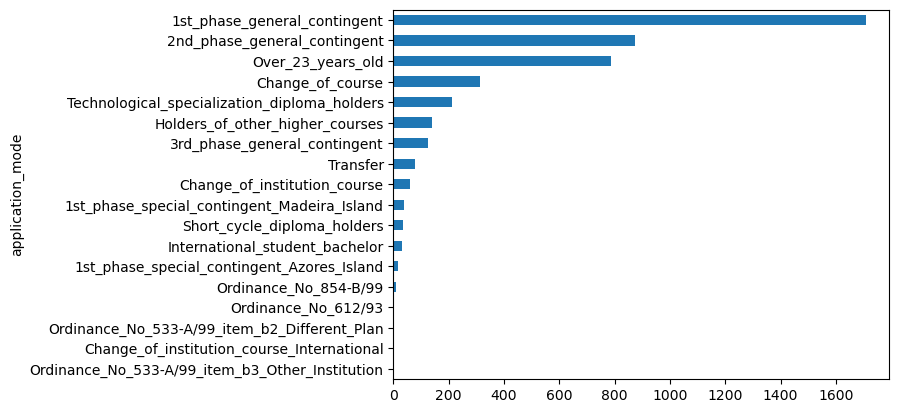

In [85]:
grouped_application_mode.sort_values().plot(kind="barh");

It seems most applicants are in the 1st or 2nd phase of the general contingent. We will one hot encode this column so, model can see differences among categories.

### Application Order

In [86]:
grouped_app_order = df.application_order.value_counts().sort_index()
grouped_app_order

application_order
0       1
1    3026
2     547
3     309
4     249
5     154
6     137
9       1
Name: count, dtype: int64

Application order (between 0 - first choice; and 9 last choice)

This column seems to actually be an ordered column so we can leave it like this.

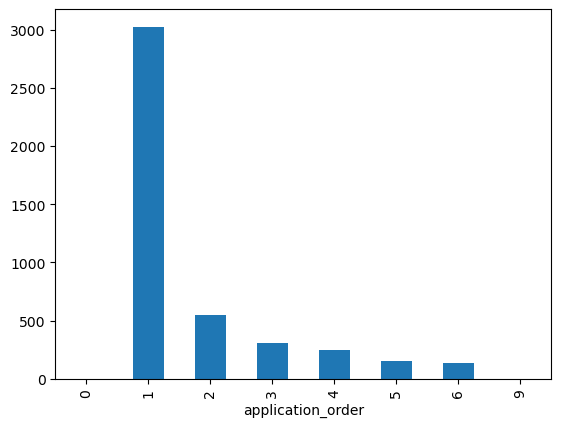

In [87]:
grouped_app_order.plot(kind="bar");

In [88]:
normalized_target_by_app_order = df.groupby(["application_order", "target"])["target"].count() / df.groupby("application_order")["target"].count()
normalized_target_by_app_order

application_order  target  
0                  Graduate    1.000000
1                  Dropout     0.347984
                   Enrolled    0.186715
                   Graduate    0.465301
2                  Dropout     0.274223
                   Enrolled    0.175503
                   Graduate    0.550274
3                  Dropout     0.245955
                   Enrolled    0.194175
                   Graduate    0.559871
4                  Dropout     0.232932
                   Enrolled    0.124498
                   Graduate    0.642570
5                  Dropout     0.344156
                   Enrolled    0.162338
                   Graduate    0.493506
6                  Dropout     0.226277
                   Enrolled    0.116788
                   Graduate    0.656934
9                  Enrolled    1.000000
Name: target, dtype: float64

### Course

In [89]:
grouped_course = df.course.value_counts().sort_index()
grouped_course

course
33       12
171     215
8014    215
9003    210
9070    226
9085    337
9119    170
9130    141
9147    380
9238    355
9254    252
9500    766
9556     86
9670    268
9773    331
9853    192
9991    268
Name: count, dtype: int64

- 33 - Biofuel Production Technologies 
- 171 - Animation and Multimedia Design 
- 8014 - Social Service (evening attendance) 
- 9003 - Agronomy 
- 9070 - Communication Design 
- 9085 - Veterinary Nursing 
- 9119 - Informatics Engineering 
- 9130 - Equinculture 
- 9147 - Management 
- 9238 - Social Service 
- 9254 - Tourism 
- 9500 - Nursing 
- 9556 - Oral Hygiene 
- 9670 - Advertising and Marketing Management 
- 9773 - Journalism and Communication 
- 9853 - Basic Education 
- 9991 - Management (evening attendance)

This data for the course column appears to course numbers so we will need to convert these to strings. We will also one hot encode this column. This is important because the model will see the numbers as ordinal and not nominal.

In [90]:
df.course = df.course.map({
    33: "Biofuel_Production_Technologies", 171: "Animation_and_Multimedia_Design",
    8014: "Social_Service_evening_attendance", 9003: "Agronomy",
    9070: "Communication_Design", 9085: "Veterinary_Nursing",
    9119: "Informatics_Engineering", 9130: "Equinculture",
    9147: "Management", 9238: "Social_Service",
    9254: "Tourism", 9500: "Nursing",
    9556: "Oral_Hygiene", 9670: "Advertising_and_Marketing_Management",
    9773: "Journalism_and_Communication", 9853: "Basic_Education",
    9991: "Management_evening_attendance"
})
grouped_courses_clean = df.course.value_counts()
grouped_courses_clean

course
Nursing                                 766
Management                              380
Social_Service                          355
Veterinary_Nursing                      337
Journalism_and_Communication            331
Advertising_and_Marketing_Management    268
Management_evening_attendance           268
Tourism                                 252
Communication_Design                    226
Animation_and_Multimedia_Design         215
Social_Service_evening_attendance       215
Agronomy                                210
Basic_Education                         192
Informatics_Engineering                 170
Equinculture                            141
Oral_Hygiene                             86
Biofuel_Production_Technologies          12
Name: count, dtype: int64

### Daytime/Evening Attendance

In [91]:
df["daytime/evening_attendance"].value_counts().sort_index()

daytime/evening_attendance
0     483
1    3941
Name: count, dtype: int64

This column appears to be binary, 1 for daytime and 0 for evening. We will turn into strings to keep clarity for later transformation steps.

In [92]:
df["daytime/evening_attendance"] = df["daytime/evening_attendance"].map({1: "daytime", 0: "evening"})
grouped_attendance = df["daytime/evening_attendance"].value_counts()
grouped_attendance

daytime/evening_attendance
daytime    3941
evening     483
Name: count, dtype: int64

### Previous Qualifications

In [93]:
df.previous_qualification.value_counts().sort_index()

previous_qualification
1     3717
2       23
3      126
4        8
5        1
6       16
9       11
10       4
12      45
14       1
15       2
19     162
38       7
39     219
40      40
42      36
43       6
Name: count, dtype: int64

- 1 - Secondary education 
- 2 - Higher education - bachelor's degree 
- 3 - Higher education - degree 
- 4 - Higher education - master's 
- 5 - Higher education - doctorate 
- 6 - Frequency of higher education 
- 9 - 12th year of schooling - not completed 
- 10 - 11th year of schooling - not completed 
- 12 - Other - 11th year of schooling 
- 14 - 10th year of schooling 
- 15 - 10th year of schooling - not completed 
- 19 - Basic education 3rd cycle (9th/10th/11th year) or equiv. 
- 38 - Basic education 2nd cycle (6th/7th/8th year) or equiv. 
- 39 - Technological specialization course 
- 40 - Higher education - degree (1st cycle) 
- 42 - Professional higher technical course 
- 43 - Higher education - master (2nd cycle)

This column provides information about how much school someone has completed I am still unsure if this can be made ordinal or nominal. We will treat it as nominal for now.

In [94]:
df.previous_qualification = df.previous_qualification.map({
    1: "Secondary_education", 2: "Higher_education_bachelors_degree",
    3: "Higher_education_degree", 4: "Higher_education_masters",
    5: "Higher_education_doctorate", 6: "Frequency_of_higher_education",
    9: "12th_year_of_schooling_not_completed", 10: "11th_year_of_schooling_not_completed",
    12: "Other_11th_year_of_schooling", 14: "10th_year_of_schooling",
    15: "10th_year_of_schooling_not_completed",
    19: "Basic_education_3rd_cycle_9th/10th/11th_year_or_equiv",
    38: "Basic_education_2nd_cycle_6th/7th/8th_year_or_equiv",
    39: "Technological_specialization_course",
    40: "Higher_education_degree_1st_cycle",
    42: "Professional_higher_technical_course",
    43: "Higher_education_master_2nd_cycle"
})
grouped_previous_qualifications = df.previous_qualification.value_counts()
grouped_previous_qualifications

previous_qualification
Secondary_education                                      3717
Technological_specialization_course                       219
Basic_education_3rd_cycle_9th/10th/11th_year_or_equiv     162
Higher_education_degree                                   126
Other_11th_year_of_schooling                               45
Higher_education_degree_1st_cycle                          40
Professional_higher_technical_course                       36
Higher_education_bachelors_degree                          23
Frequency_of_higher_education                              16
12th_year_of_schooling_not_completed                       11
Higher_education_masters                                    8
Basic_education_2nd_cycle_6th/7th/8th_year_or_equiv         7
Higher_education_master_2nd_cycle                           6
11th_year_of_schooling_not_completed                        4
10th_year_of_schooling_not_completed                        2
Higher_education_doctorate                     

### Previous Qualification Grade

Grade of previous qualification (between 0 and 200)

In [95]:
df["previous_qualification_(grade)"].describe()

count    4424.000000
mean      132.613314
std        13.188332
min        95.000000
25%       125.000000
50%       133.100000
75%       140.000000
max       190.000000
Name: previous_qualification_(grade), dtype: float64

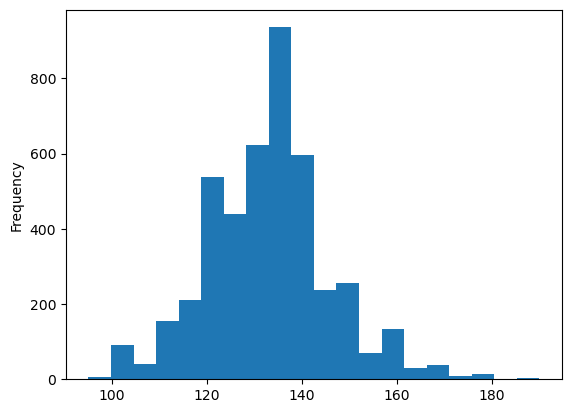

In [96]:
df["previous_qualification_(grade)"].plot(kind="hist", bins=20);

This data look to be normally distributed with a mean of 132 and standard deviation of 13. For the model we can consider transforming this column to a z-score.

### Nationality

This column needs to be renamed from Nacionality to Nationality

In [19]:
df.nacionality.value_counts().sort_index()

nacionality
1      4314
2         2
6        13
11        3
13        1
14        1
17        1
21        2
22       13
24        5
25        2
26       14
32        1
41       38
62        2
100       3
101       2
103       3
105       2
108       1
109       1
Name: count, dtype: int64

- This is a nominal column of where someone is from, we will convert this back to strings then later one hot encode it.

- 1 - Portuguese; 
- 2 - German; 
- 6 - Spanish; 
- 11 - Italian; 
- 13 - Dutch; 
- 14 - English; 
- 17 - Lithuanian; 
- 21 - Angolan; 
- 22 - Cape Verdean; 
- 24 - Guinean; 
- 25 - Mozambican; 
- 26 - Santomean; 
- 32 - Turkish; 
- 41 - Brazilian; 
- 62 - Romanian; 
- 100 - Moldova (Republic of); 
- 101 - Mexican; 
- 103 - Ukrainian; 
- 105 - Russian; 
- 108 - Cuban; 
- 109 - Colombian

In [98]:
df = df.rename(columns={"nacionality": "nationality"})

In [99]:
df.nationality = df.nationality.map({
    1: "Portuguese", 2: "German", 6: "Spanish", 11: "Italian",
    13: "Dutch", 14: "English", 17: "Lithuanian", 21: "Angolan",
    22: "Cape_Verdean", 24: "Guinean", 25: "Mozambican",
    26: "Santomean", 32: "Turkish", 41: "Brazilian",
    62: "Romanian", 100: "Moldova_Republic_of",
    101: "Mexican", 103: "Ukrainian", 105: "Russian",
    108: "Cuban", 109: "Colombian"
})
grouped_nationality = df.nationality.value_counts()
grouped_nationality

nationality
Portuguese             4314
Brazilian                38
Santomean                14
Cape_Verdean             13
Spanish                  13
Guinean                   5
Moldova_Republic_of       3
Italian                   3
Ukrainian                 3
Angolan                   2
Mexican                   2
Romanian                  2
Mozambican                2
German                    2
Russian                   2
Turkish                   1
Dutch                     1
Colombian                 1
Cuban                     1
English                   1
Lithuanian                1
Name: count, dtype: int64

### Mother's Qualification

- 1 - Secondary Education - 12th Year of Schooling or Eq. 
- 2 - Higher Education - Bachelor's Degree 
- 3 - Higher Education - Degree 
- 4 - Higher Education - Master's 
- 5 - Higher Education - Doctorate 
- 6 - Frequency of Higher Education 
- 9 - 12th Year of Schooling - Not Completed 
- 10 - 11th Year of Schooling - Not Completed 
- 11 - 7th Year (Old) 
- 12 - Other - 11th Year of Schooling 
- 14 - 10th Year of Schooling 
- 18 - General commerce course 
- 19 - Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv. 
- 22 - Technical-professional course 
- 26 - 7th year of schooling 
- 27 - 2nd cycle of the general high school course 
- 29 - 9th Year of Schooling - Not Completed 
- 30 - 8th year of schooling 
- 34 - Unknown 
- 35 - Can't read or write 
- 36 - Can read without having a 4th year of schooling 
- 37 - Basic education 1st cycle (4th/5th year) or equiv. 
- 38 - Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv. 
- 39 - Technological specialization course 
- 40 - Higher education - degree (1st cycle) 
- 41 - Specialized higher studies course 
- 42 - Professional higher technical course 
- 43 - Higher Education - Master (2nd cycle) 
- 44 - Higher Education - Doctorate (3rd cycle)

In [101]:
df["mother's_qualification"].value_counts().sort_index()

mother's_qualification
1     1069
2       83
3      438
4       49
5       21
6        4
9        8
10       3
11       3
12      42
14       2
18       1
19     953
22       1
26       1
27       1
29       3
30       3
34     130
35       3
36       3
37    1009
38     562
39       8
40       9
41       6
42       4
43       4
44       1
Name: count, dtype: int64

In [102]:
df["mother\'s_qualification"] = df["mother\'s_qualification"].map({
    1: "Secondary_Education_12th_Year_of_Schooling_or_Eq",
    2: "Higher_Education_Bachelors_Degree",
    3: "Higher_Education_Degree",
    4: "Higher_Education_Masters",
    5: "Higher_Education_Doctorate",
    6: "Frequency_of_Higher_Education",
    9: "12th_Year_of_Schooling_Not_Completed",
    10: "11th_Year_of_Schooling_Not_Completed",
    11: "7th_Year_Old",
    12: "Other_11th_Year_of_Schooling",
    14: "10th_Year_of_Schooling",
    18: "General_commerce_course",
    19: "Basic_Education_3rd_Cycle_9th/10th/11th_Year_or_Equiv",
    22: "Technical-professional_course",
    26: "7th_year_of_schooling",
    27: "2nd_cycle_of_the_general_high_school_course",
    29: "9th_Year_of_Schooling_Not_Completed",
    30: "8th_year_of_schooling",
    34: "Unknown",
    35: "Can't_read_or_write",
    36: "Can_read_without_having_a_4th_year_of_schooling",
    37: "Basic_education_1st_cycle_4th/5th_year_or_equiv",
    38: "Basic_Education_2nd_Cycle_6th/7th/8th_Year_or_Equiv",
    39: "Technological_specialization_course",
    40: "Higher_education_degree_1st_cycle",
    41: "Specialized_higher_studies_course",
    42: "Professional_higher_technical_course",
    43: "Higher_Education_Master_2nd_cycle",
    44: "Higher_Education_Doctorate_3rd_cycle"
})

In [103]:
grouped_mothers_qualification = df["mother's_qualification"].value_counts()
grouped_mothers_qualification

mother's_qualification
Secondary_Education_12th_Year_of_Schooling_or_Eq         1069
Basic_education_1st_cycle_4th/5th_year_or_equiv          1009
Basic_Education_3rd_Cycle_9th/10th/11th_Year_or_Equiv     953
Basic_Education_2nd_Cycle_6th/7th/8th_Year_or_Equiv       562
Higher_Education_Degree                                   438
Unknown                                                   130
Higher_Education_Bachelors_Degree                          83
Higher_Education_Masters                                   49
Other_11th_Year_of_Schooling                               42
Higher_Education_Doctorate                                 21
Higher_education_degree_1st_cycle                           9
12th_Year_of_Schooling_Not_Completed                        8
Technological_specialization_course                         8
Specialized_higher_studies_course                           6
Frequency_of_Higher_Education                               4
Professional_higher_technical_course           

In [104]:
df.isna().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime/evening_attendance                        0
previous_qualification                            0
previous_qualification_(grade)                    0
nationality                                       0
mother's_qualification                            0
father's_qualification                            0
mother's_occupation                               0
father's_occupation                               0
admission_grade                                   0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age_at_enrol

## Scholarship holder

In [86]:
df.scholarship_holder.value_counts()

scholarship_holder
0    3325
1    1099
Name: count, dtype: int64

In [88]:
df["scholarship_holder"] = df["scholarship_holder"].map({1: "Yes", 0: "No"})

In [90]:
percentage_holders = len(df[df['scholarship_holder'] == "No"]) / len(df) * 100
percentage_no_holders = len(df[df['scholarship_holder'] == "Yes"]) / len(df) * 100
print("% scholasrhip holders = ", percentage_holders)
print("% no scholarship holders = ", percentage_no_holders)

% scholasrhip holders =  75.15822784810126
% no scholarship holders =  24.841772151898734


### Age at enrollement

In [94]:
df.age_at_enrollment.value_counts()
df.age_at_enrollment.describe()

count    4424.000000
mean       23.265145
std         7.587816
min        17.000000
25%        19.000000
50%        20.000000
75%        25.000000
max        70.000000
Name: age_at_enrollment, dtype: float64

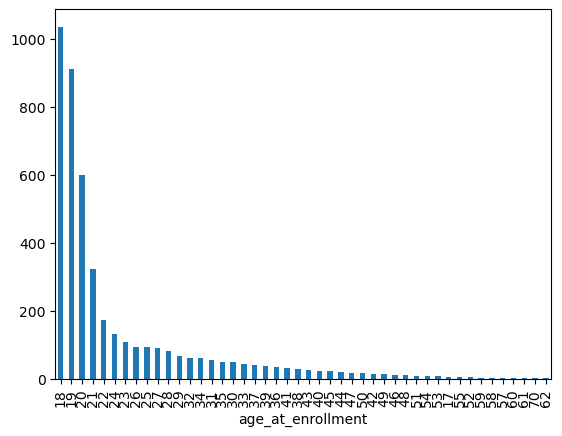

In [96]:
df["age_at_enrollment"].value_counts().plot(kind="bar");

### International

In [11]:
df.international.value_counts()

international
0    4314
1     110
Name: count, dtype: int64

In [13]:
df["international"] = df["international"].map({1: "Yes", 0: "No"})

In [15]:
percentage_locals = len(df[df['international'] == "No"]) / len(df) * 100
percentage_no_locals = len(df[df['international'] == "Yes"]) / len(df) * 100
print("% local students = ", percentage_locals)
print("% no local students = ", percentage_no_locals)

% local students =  97.51356238698011
% no local students =  2.4864376130198913


### Curricular units 1st sem (credited)  

In [38]:
print(df['curricular_units_1st_sem_(credited)'].describe())

count    4424.000000
mean        0.709991
std         2.360507
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: curricular_units_1st_sem_(credited), dtype: float64


In [31]:
print(df["curricular_units_1st_sem_(credited)"].value_counts().sort_index())

curricular_units_1st_sem_(credited)
0     3847
1       85
2       94
3       69
4       47
5       41
6       51
7       41
8       31
9       27
10      15
11      17
12      12
13      13
14      15
15       5
16       3
17       3
18       4
19       2
20       2
Name: count, dtype: int64


- 1st column number of units
- 2nd column number of students that credited that amount of units

Example:
3847 students creditted 0 units,
while 2 students creditted 20 units in one semester


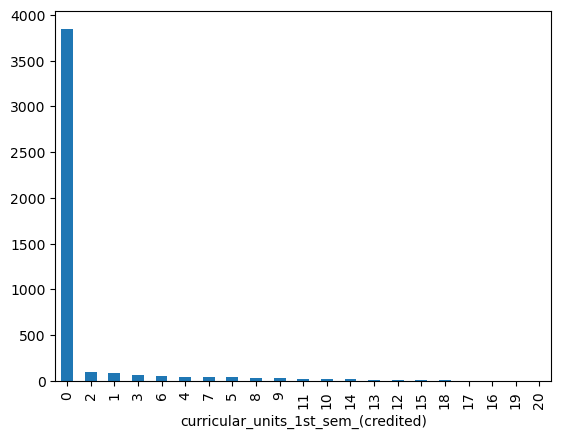

In [34]:
df["curricular_units_1st_sem_(credited)"].value_counts().plot(kind="bar");

### Curricular units 1st sem (enrolled) 

In [40]:
print(df['curricular_units_1st_sem_(enrolled)'].describe())

count    4424.000000
mean        6.270570
std         2.480178
min         0.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        26.000000
Name: curricular_units_1st_sem_(enrolled), dtype: float64


In [51]:
print(df["curricular_units_1st_sem_(enrolled)"].value_counts().sort_index())

curricular_units_1st_sem_(enrolled)
0      180
1        7
2        9
3       10
4       21
5     1010
6     1910
7      656
8      296
9       36
10      52
11      45
12      66
13      20
14      22
15      25
16      13
17      16
18      19
19       2
21       6
23       2
26       1
Name: count, dtype: int64


- 1st column number of units enrolled
- 2nd column number of students that enrolled that amount of units

Example: only one students enrolled 26 units!!

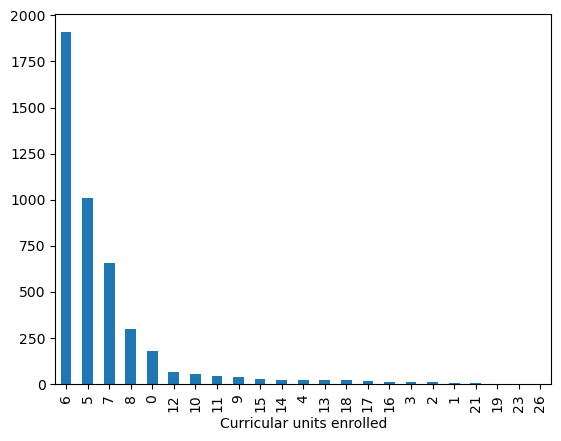

In [44]:
df["curricular_units_1st_sem_(enrolled)"].value_counts().plot(kind="bar", xlabel = "Curricular units enrolled");

### Curricular units 1st sem (evaluations)

In [51]:
print(df['curricular_units_1st_sem_(evaluations)'].describe())

count    4424.000000
mean        8.299051
std         4.179106
min         0.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        45.000000
Name: curricular_units_1st_sem_(evaluations), dtype: float64


In [53]:
print(df["curricular_units_1st_sem_(evaluations)"].value_counts().sort_index())

curricular_units_1st_sem_(evaluations)
0     349
1       6
2       8
3       6
4      19
5     220
6     598
7     703
8     791
9     402
10    340
11    239
12    223
13    140
14    105
15     70
16     47
17     33
18     30
19     23
20     12
21     17
22     10
23      9
24      6
25      3
26      4
27      2
28      1
29      2
31      1
32      1
33      1
36      1
45      2
Name: count, dtype: int64


- 1st column number of units evaluated
- 2nd column number of students that were evaluated

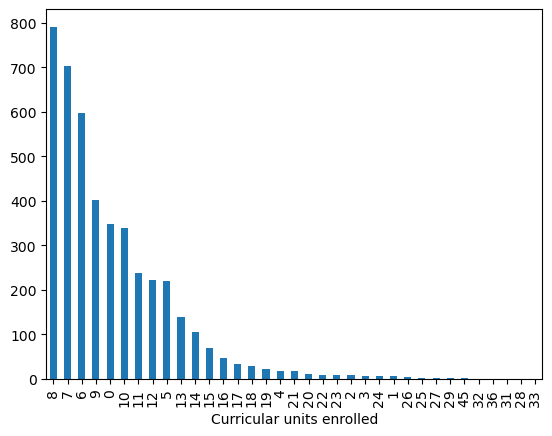

In [56]:
df["curricular_units_1st_sem_(evaluations)"].value_counts().plot(kind="bar", xlabel = "Curricular units enrolled");

### Curricular units 1st sem (Grade)

In [65]:
df["curricular_units_1st_sem_(grade)"].describe()

count    4424.000000
mean       10.640822
std         4.843663
min         0.000000
25%        11.000000
50%        12.285714
75%        13.400000
max        18.875000
Name: curricular_units_1st_sem_(grade), dtype: float64

In [70]:
print(df["curricular_units_1st_sem_(grade)"].value_counts().sort_index())

curricular_units_1st_sem_(grade)
0.000000     718
9.800000       1
10.000000     82
10.166667      1
10.200000      8
            ... 
17.111111      1
17.125000      1
17.333333      2
18.000000      2
18.875000      1
Name: count, Length: 805, dtype: int64


- 1st column grade of the unit (0 - 20)
- 2dn column students that got this grade
  
  Example: 718 students got a grade of 0 in some unit.
  The grade is a continuos variable

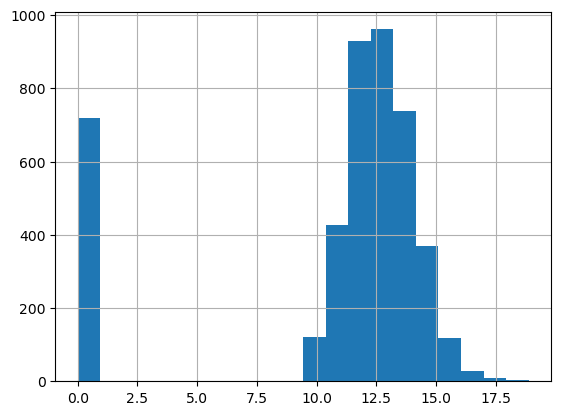

In [68]:
df['curricular_units_1st_sem_(grade)'].hist(bins=20);

### Curricular units 1st sem (without evaluations)

In [73]:
print(df["curricular_units_1st_sem_(without_evaluations)"].value_counts().sort_index())

curricular_units_1st_sem_(without_evaluations)
0     4130
1      153
2       79
3       23
4       15
5        5
6        6
7        6
8        4
10       1
12       2
Name: count, dtype: int64


- 1st column: Number of units with not evaluation
- 2nd column: Number of students that got this number of unis with no evaluation

Example: 4130 students got 0 units with no evaluation

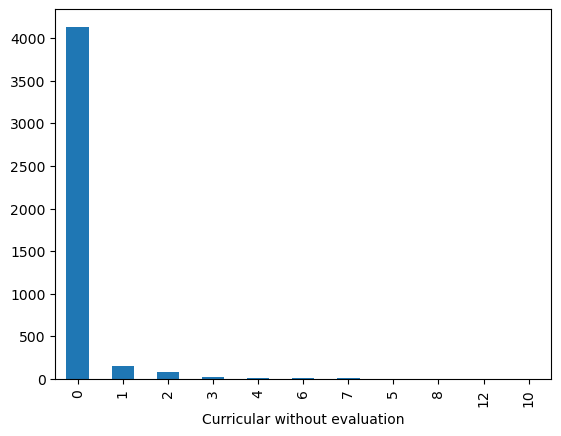

In [74]:
df["curricular_units_1st_sem_(without_evaluations)"].value_counts().plot(kind="bar", xlabel = "Curricular without evaluation");